## Han Nguyen
## Project 1 - Double-moon classification
## CSC/DA 427/527

In [1]:
from random import random
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.pylab import *

### Function to generating double-moon

In [2]:
def moon(num_points, distance, radius, width):
    points = num_points

    x1 = [0 for _ in range(points)]
    y1 = [0 for _ in range(points)]
    x2 = [0 for _ in range(points)]
    y2 = [0 for _ in range(points)]

    for i in range(points):
        d = distance
        r = radius
        w = width
        a = random() * math.pi
        x1[i] = math.sqrt(random()) * math.cos(a) * (w / 2) + (
                    (-(r + w / 2) if (random() < 0.5) else (r + w / 2)) * math.cos(a))
        y1[i] = math.sqrt(random()) * math.sin(a) * (w) + (r * math.sin(a)) + d

        a = random() * math.pi + math.pi
        x2[i] = (r + w / 2) + math.sqrt(random()) * math.cos(a) * (w / 2) + (
            (-(r + w / 2)) if (random() < 0.5) else (r + w / 2)) * math.cos(a)
        y2[i] = -(math.sqrt(random()) * math.sin(a) * (-w) + (-r * math.sin(a))) - d
    return ([x1, x2, y1, y2])

In [3]:
def generateData(num_points, distance, radius, width):
    x1, x2, y1, y2 = moon(num_points, distance, radius, width)
    dt = []
    dt.extend([x1[i], y1[i],  1] for i in range(num_points))
    dt.extend([x2[i], y2[i], -1] for i in range(num_points))
    
    return dt

### Initialize the bias and learning rate for the perceptron
We define the (m + 1)-by-1 weight vector as

w(n) = [b, w1(n), w2(n), ..., wm(n)]T

The w0(n) corresponding to i = 0, represents the bias b.

In [4]:
learningRate = 0.01
b = [0.1]
w = b + [0 for _ in range(2)]


### Computation of actual response
Computation of actual response of the perceptron as 

y(n) = sgn[wT(n)*(n)]

where sgn(·) is the signum function

sgn(v) = +1 if v > 0 or -1 if v < 0

In [5]:
def perceptronOutput(x, w):
    
    y = w[0]
    for i in range(2):
        y += sum([i*j for i, j in zip(w[1:],x[0:2])])  # dot product between w and x
    return 1 if y >= 0 else -1
    

### Adaptation of Weight Vector. 
Update the weight vector of the perceptron to obtain

 w(n + 1) = w(n) + learning rate * [d(n) - y(n)] * (n)
 
 error signal = d(n) - y(n)
 
 d(n) = +1 if x(n) belongs to class c1
 
 d(n) = -1 if x(n) belongs to class c2

In [6]:
def weightAdaptation(x, learningRate, errorSignal, w):
    
    return [i + learningRate*errorSignal*j for i, j in zip(w[1:], x[0:2])]


### Training step

Every vector in the data must have three elements. The third element (x[2]) must be the label (desired output)

In [7]:
def train(dt, learningRate, w):
    
    epochs_num = 0 # number of epoch
    MSE = [] # mean squared error
    
    while True:
        totalError = 0.00
        for x in dt: # for each sample in the data set
            desired = perceptronOutput(x, w) # predicted response y(n)
            actual = x[2] # actual response d(n)
            if actual != desired:
                errorSignal = actual - desired  # e(n) = d(n) - y(n)
                w[1:] = weightAdaptation(x, learningRate, errorSignal, w)
                w[0] = w[0] + learningRate * errorSignal
                
                totalError += errorSignal**2        
        epochs_num += 1
        MSE.append(totalError/50)
           
        if totalError == 0.0 or epochs_num >= 50: # stop condition
            break
            
    return w, MSE
    

### Decision boundary

In [8]:
def boundary(w, dt):
    x = np.linspace(np.amin(dt), np.amax(dt), 50)
    y = -(w[0] + x*w[1])/w[2]
    
    plt.plot(x, y, 'black')

## Task 1 -  A - implement the Rosenbaltt’s perceptron using the parameter with d = 1

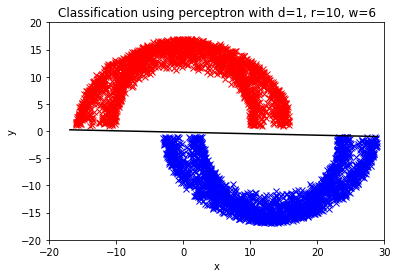

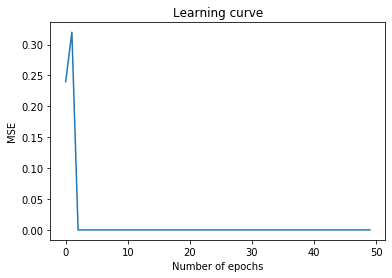

In [9]:
trainSet = generateData(1000, 1, 10, 6)
testSet = generateData(2000, 1, 10, 6)

result, MSE = train(trainSet, learningRate, w)

# perceptron test
for x in testSet:
    plt.figure(1)
    predicted = perceptronOutput(x, result)
    if predicted == 1:
        plt.plot(x[0], x[1], 'x', color = 'red')
    else:
        plt.plot(x[0], x[1], 'x', color = 'blue')
        
# decision boundary
plt.figure(1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Classification using perceptron with d=1, r=10, w=6")
boundary(result, testSet)
plt.axis([-20, 30, -20, 20])


iteration = [i for i in range(50)]
if len(MSE) < 50:
  for i in range(50-len(MSE)):
    MSE.append(0)
    
plt.figure(2)    
plt.plot(iteration, MSE)
plt.xlabel("Number of epochs")
plt.ylabel("MSE")
plt.title("Learning curve")

plt.show()


## Task 1 -  B - implement the Rosenbaltt’s perceptron using the parameter with d = -4

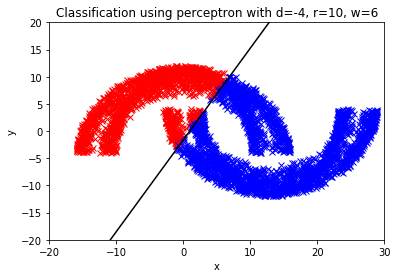

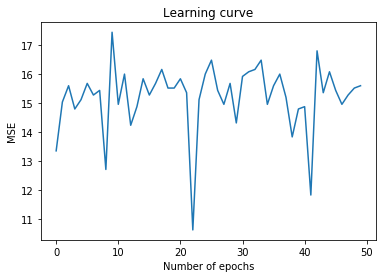

In [10]:
trainSet = generateData(1000, -4, 10, 6)
testSet = generateData(2000, -4, 10, 6)

result, MSE = train(trainSet, learningRate, w)

# perceptron test
for x in testSet:
    plt.figure(1)
    predicted = perceptronOutput(x, result)
    if predicted == 1:
        plt.plot(x[0], x[1], 'x', color = 'red')
    else:
        plt.plot(x[0], x[1], 'x', color = 'blue')
        
# decision boundary
plt.figure(1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Classification using perceptron with d=-4, r=10, w=6")
boundary(result, testSet)
plt.axis([-20, 30, -20, 20])


iteration = [i for i in range(50)]
if len(MSE) < 50:
  for i in range(50-len(MSE)):
    MSE.append(0)
    
plt.figure(2)    
plt.plot(iteration, MSE)
plt.xlabel("Number of epochs")
plt.ylabel("MSE")
plt.title("Learning curve")

plt.show()

## Task 2 -  implement the Rosenbaltt’s perceptron using the parameter with d = 0

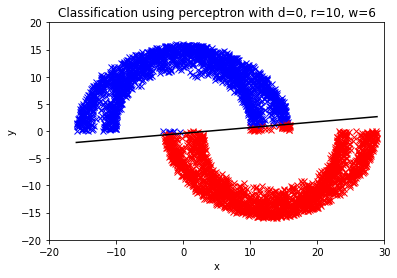

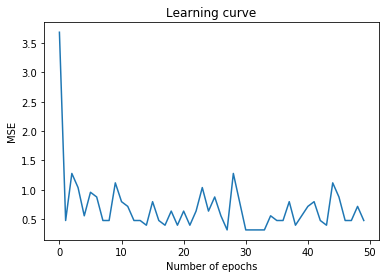

In [11]:
trainSet = generateData(1000, 0, 10, 6)
testSet = generateData(2000, 0, 10, 6)

result, MSE = train(trainSet, learningRate, w)

# perceptron test
for x in testSet:
    plt.figure(1)
    predicted = perceptronOutput(x, result)
    if predicted == 1:
        plt.plot(x[0], x[1], 'x', color = 'blue')
    else:
        plt.plot(x[0], x[1], 'x', color = 'red')
        
# decision boundary
plt.figure(1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Classification using perceptron with d=0, r=10, w=6")
boundary(result, testSet)
plt.axis([-20, 30, -20, 20])


iteration = [i for i in range(50)]
if len(MSE) < 50:
  for i in range(50-len(MSE)):
    MSE.append(0)
    
plt.figure(2)    
plt.plot(iteration, MSE)
plt.xlabel("Number of epochs")
plt.ylabel("MSE")
plt.title("Learning curve")

plt.show()
